In [46]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import(
                                    StratifiedKFold,
                                    cross_validate
)
from sklearn.metrics import (
                            accuracy_score,
                            precision_score,
                            confusion_matrix
)

### 1. Load the data

In [47]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/y_test.npz')['arr_0']

### 2. Define Multi Models


In [48]:
models = {
    # --- Baselines ---
    "Logistic Regression": LogisticRegression(),
    "Gaussian Naive Bayes": GaussianNB(),
    
    # --- Standard Tree Model ---
    "Decision Tree": DecisionTreeClassifier(),
    
    # --- Powerful Ensemble Models (Top Contenders) ---
    "Bagging Classifier": BaggingClassifier(), # <-- ADDED
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    
    # --- Non-tree-based Contender ---
    "Support Vector Machine (SVC)": SVC()
}

### 3. Configure K-Fold CV

In [49]:
cv = StratifiedKFold(
                    n_splits=6,
                    random_state=42,
                    shuffle=True
)

In [50]:
trained_models = {}

for model_name, model in models.items():
    print(f"\nCross Validation on {model_name}")

    cv_results = cross_validate(
                            model,
                            X_train,
                            Y_train,
                            cv=cv, scoring='f1',
                            return_estimator=True,
                            return_train_score=False
    )
    print(cv_results)

    test_scores = cv_results['test_score']
    print(test_scores)

    best_index = np.argmax(test_scores)

    estimator = cv_results['estimator'][best_index]
    trained_models[model_name] = estimator


Cross Validation on Logistic Regression
{'fit_time': array([0.04213858, 0.02649379, 0.01817369, 0.01455712, 0.01214981,
       0.01143718]), 'score_time': array([0.00386143, 0.00295568, 0.0023396 , 0.00219321, 0.00173855,
       0.00175095]), 'estimator': [LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression()], 'test_score': array([0.76381215, 0.76197085, 0.76150628, 0.75694444, 0.76203768,
       0.78450704])}
[0.76381215 0.76197085 0.76150628 0.75694444 0.76203768 0.78450704]

Cross Validation on Gaussian Naive Bayes
{'fit_time': array([0.00231385, 0.00229025, 0.0020206 , 0.00191569, 0.00183606,
       0.00193286]), 'score_time': array([0.00193524, 0.00187659, 0.0017252 , 0.00171208, 0.00163865,
       0.00170755]), 'estimator': [GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB()], 'test_score': array([0.75210084, 0.74301676, 0.74233983, 0.74947662, 0.7527933 ,
       0.76462

c:\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have v

{'fit_time': array([0.12886572, 0.12456846, 0.12459588, 0.17158914, 0.32104158,
       0.15073705]), 'score_time': array([0.00525069, 0.00448847, 0.00497627, 0.0057683 , 0.00588989,
       0.00528049]), 'estimator': [LGBMClassifier(), LGBMClassifier(), LGBMClassifier(), LGBMClassifier(), LGBMClassifier(), LGBMClassifier()], 'test_score': array([0.83309558, 0.84861407, 0.83511777, 0.83884892, 0.84950774,
       0.83758194])}
[0.83309558 0.84861407 0.83511777 0.83884892 0.84950774 0.83758194]

Cross Validation on Support Vector Machine (SVC)
{'fit_time': array([1.189224  , 1.17870569, 1.26520205, 1.24003553, 1.428931  ,
       1.37196732]), 'score_time': array([0.41975522, 0.40819049, 0.57743573, 0.42384028, 0.46432209,
       0.45418167]), 'estimator': [SVC(), SVC(), SVC(), SVC(), SVC(), SVC()], 'test_score': array([0.77868852, 0.77947295, 0.79755435, 0.77845944, 0.7816564 ,
       0.79242637])}
[0.77868852 0.77947295 0.79755435 0.77845944 0.7816564  0.79242637]


In [51]:
trained_models

{'Logistic Regression': LogisticRegression(),
 'Gaussian Naive Bayes': GaussianNB(),
 'Decision Tree': DecisionTreeClassifier(),
 'Bagging Classifier': BaggingClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
     

In [52]:
Y_hat_tests = {}
for model_name, model in trained_models.items():
    Y_hat_test = model.predict(X_test)
    Y_hat_tests[model_name] = Y_hat_test

Y_hat_tests

c:\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


{'Logistic Regression': array([1., 0., 0., ..., 0., 0., 1.]),
 'Gaussian Naive Bayes': array([1., 0., 0., ..., 0., 0., 1.]),
 'Decision Tree': array([1., 0., 0., ..., 0., 0., 1.]),
 'Bagging Classifier': array([1., 0., 0., ..., 0., 0., 0.]),
 'Random Forest': array([1., 0., 0., ..., 0., 0., 1.]),
 'Gradient Boosting': array([1., 0., 0., ..., 0., 0., 1.]),
 'XGBoost': array([1, 0, 0, ..., 0, 0, 1]),
 'LightGBM': array([1., 0., 0., ..., 0., 0., 1.]),
 'Support Vector Machine (SVC)': array([1., 0., 0., ..., 0., 0., 1.])}

In [53]:
# Get the list of all model names
model_names = models.keys()

# Create a new dictionary to store all the confusion matrices
confusion_matrices = {}

# Loop through each model, calculate its confusion matrix, and save it
for name in model_names:
    y_pred = Y_hat_tests[name]
    cm = confusion_matrix(Y_test, y_pred)
    confusion_matrices[name] = cm

# Now you can easily access any confusion matrix by its name
print("--- XGBoost Confusion Matrix ---")
print(confusion_matrices["XGBoost"])

print("\n--- Logistic Regression Confusion Matrix ---")
print(confusion_matrices["Logistic Regression"])

print("\n--- Bagging Classifier Confusion Matrix ---")
print(confusion_matrices["Bagging Classifier"])

--- XGBoost Confusion Matrix ---
[[866 170]
 [139 234]]

--- Logistic Regression Confusion Matrix ---
[[746 290]
 [ 65 308]]

--- Bagging Classifier Confusion Matrix ---
[[867 169]
 [144 229]]


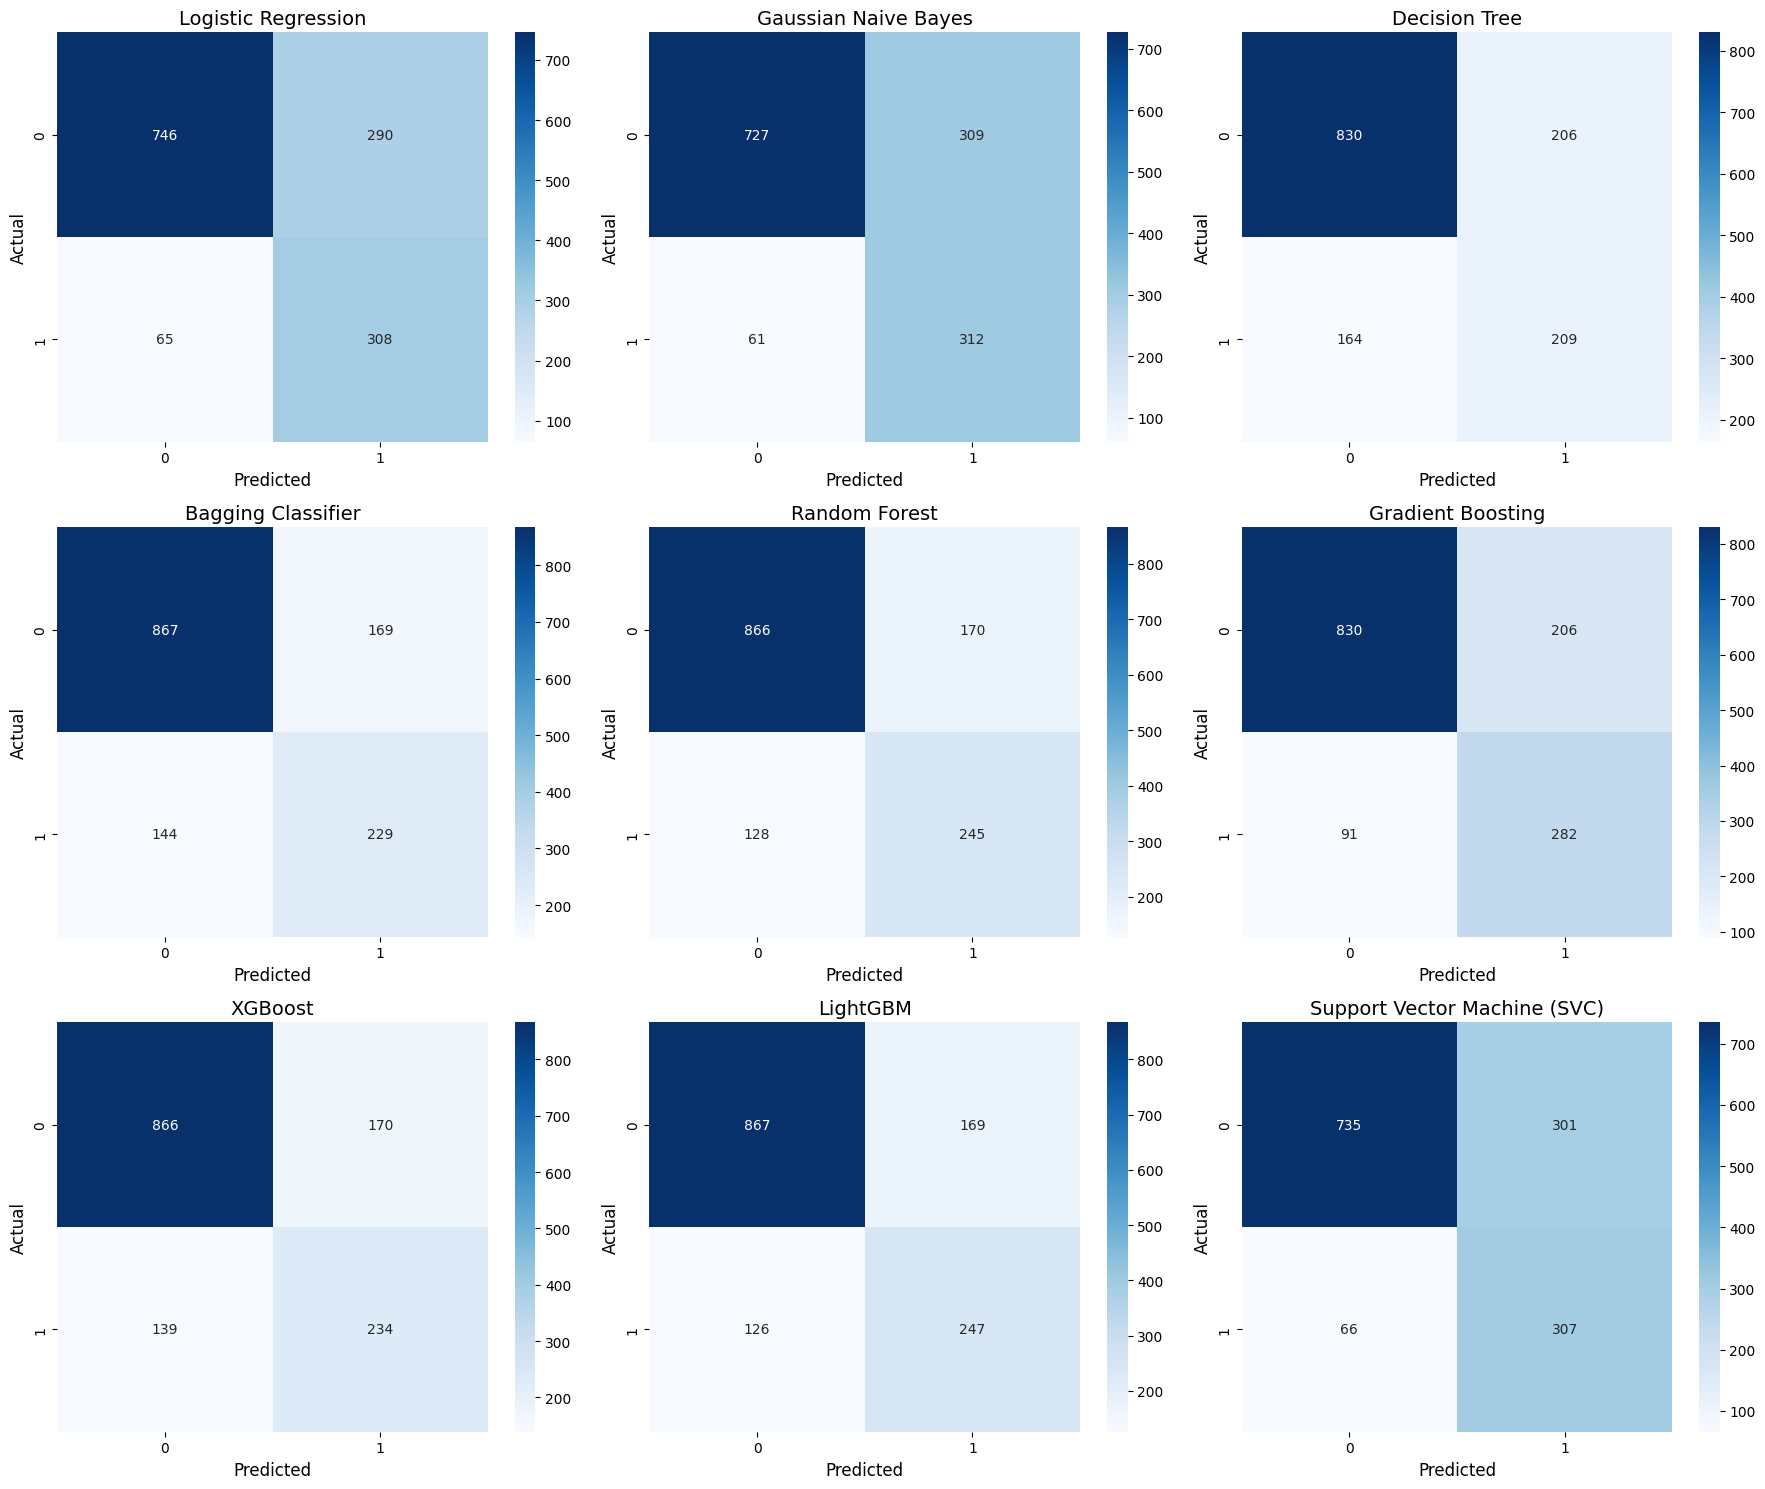

In [54]:
model_names = confusion_matrices.keys()
n_models = len(model_names)

ncols = 3 
nrows = int(np.ceil(n_models / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 5))
axes = axes.flatten()

# --- Loop and plot each confusion matrix ---
for i, (name, cm) in enumerate(confusion_matrices.items()):
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name, fontsize=14)
    ax.set_xlabel('Predicted', fontsize=12)
    ax.set_ylabel('Actual', fontsize=12)

# --- Hide any unused subplots ---
# If you have 8 models, a 3x3 grid has 9 plots. This hides the 9th.
for i in range(n_models, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# We can see that the Bagging Classifier and LightBGM model performed the best
# out of all the models that we tried
# From these two models, we can choose LightGBM as our final model because we want to
# prevent false negatives as much as possible in predicting churners.

In [55]:
# cm1 = confusion_matrix(Y_test, Y_hat_tests["Logistic Regression"])
# cm2 = confusion_matrix(Y_test, Y_hat_tests["Decision Tree"])
# cm3 = confusion_matrix(Y_test, Y_hat_tests["Random Forest"])

In [56]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

# sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax1)
# ax1.set_title('LogisticRegression')
# ax1.set_xlabel('Predicted')
# ax1.set_ylabel('Actual')

# sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=ax2)
# ax2.set_title('DecisionTreeClassifier')
# ax2.set_xlabel('Predicted')
# ax2.set_ylabel('Actual')

# sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', ax=ax3)
# ax3.set_title('RandomForestClassifier')
# ax3.set_xlabel('Predicted')
# ax3.set_ylabel('Actual')

# plt.tight_layout()
# plt.show()


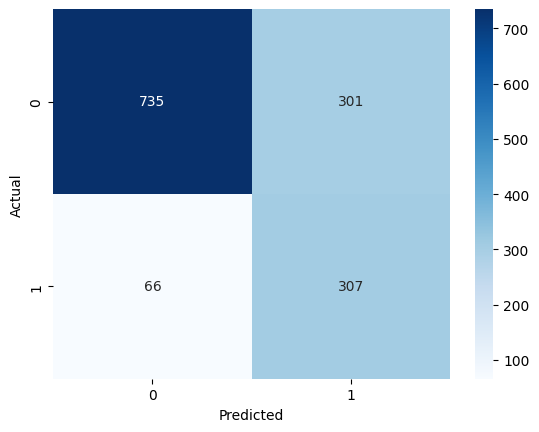

In [57]:
# This is the cm for the last model we try out
# In our case, it's Support Vector Machines

cm = confusion_matrix(Y_test, Y_hat_test)
cm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()